## Q4_Ans_Implement Convolutional Neural Network using any suitable dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR10 dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
# plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

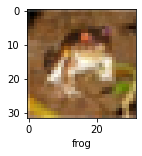

In [10]:
plot_sample(X_train, y_train, 0)

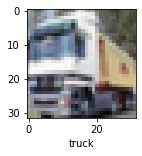

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8082 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6230 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5414 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4846 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4312 - accuracy: 0.4969


At the end of 5 epochs, accuracy is at around 49%

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.70      0.55      1000
           1       0.63      0.61      0.62      1000
           2       0.50      0.12      0.19      1000
           3       0.43      0.19      0.27      1000
           4       0.37      0.51      0.43      1000
           5       0.39      0.41      0.40      1000
           6       0.41      0.68      0.51      1000
           7       0.57      0.55      0.56      1000
           8       0.73      0.48      0.58      1000
           9       0.52      0.60      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# Build a convolutional neural network to train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the Model

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the Model

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4583 - accuracy: 0.4766
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1039 - accuracy: 0.6167
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9821 - accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8975 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8300 - accuracy: 0.7137
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7728 - accuracy: 0.7324
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7226 - accuracy: 0.7493
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6798 - accuracy: 0.7615
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6367 - accuracy: 0.7791
Epoch 10/10
1563/1563 [==============================] - 56s 36m

# Evaluate

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 12ms/step - loss: 0.9357 - accuracy: 0.6977


[0.9356833696365356, 0.697700023651123]

# Prediction

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[5.2920059e-06, 1.2472309e-06, 2.0403026e-04, 9.7052604e-01,
        3.5590856e-05, 1.4653925e-02, 1.3009069e-03, 4.2157139e-05,
        1.3221489e-02, 9.3748986e-06],
       [1.1743268e-03, 2.8217690e-02, 3.2604447e-07, 9.9772883e-08,
        1.2972140e-08, 3.4680200e-10, 2.7852512e-10, 8.6987244e-09,
        9.6993184e-01, 6.7573105e-04],
       [8.9440346e-03, 1.8045233e-01, 1.3825820e-04, 3.2047632e-03,
        3.6397504e-04, 1.2876700e-04, 5.9325790e-05, 2.8111169e-04,
        7.6447868e-01, 4.1948780e-02],
       [7.2958481e-01, 8.8304299e-04, 1.1422937e-03, 1.6827042e-04,
        2.5478795e-03, 8.9847372e-06, 3.9185750e-05, 5.2662267e-06,
        2.6537111e-01, 2.4915117e-04],
       [8.5073061e-08, 1.3164675e-06, 9.7511327e-03, 3.7958369e-02,
        1.2163451e-01, 4.2224461e-03, 8.2618397e-01, 2.4699460e-05,
        2.2346165e-04, 1.9820319e-09]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

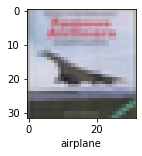

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
confusion =confusion_matrix(y_test, y_classes)
confusion

array([[679,  18,  51,  34,  21,   8,   8,  13, 124,  44],
       [ 22, 787,   2,  25,   3,   7,  11,   4,  35, 104],
       [ 54,   6, 570,  91,  96,  63,  55,  37,  17,  11],
       [ 21,   6,  48, 605,  67, 146,  50,  27,  15,  15],
       [ 13,   4,  79,  84, 656,  38,  42,  67,  16,   1],
       [  5,   4,  48, 194,  52, 616,  17,  47,  10,   7],
       [  5,   5,  46, 122,  52,  26, 727,   7,   8,   2],
       [ 16,   2,  34,  64,  68,  75,   7, 717,   3,  14],
       [ 42,  28,   7,  18,   7,  12,   9,   5, 849,  23],
       [ 18,  81,   7,  35,   4,   8,  11,  15,  50, 771]], dtype=int64)

<AxesSubplot:>

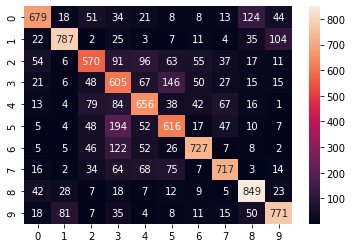

In [26]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d')

In [27]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1000
           1       0.84      0.79      0.81      1000
           2       0.64      0.57      0.60      1000
           3       0.48      0.60      0.53      1000
           4       0.64      0.66      0.65      1000
           5       0.62      0.62      0.62      1000
           6       0.78      0.73      0.75      1000
           7       0.76      0.72      0.74      1000
           8       0.75      0.85      0.80      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

